## Trajs_show6

In [23]:
from trajs_show6 import *

In [24]:
color_table = [ "#4682B4", "#8B4513", "#00FF7F", "#FFA500", "#48D1CC", "#FF4500", "#B22222", "#808080", "#BDB76B", "#000080" ]

In [25]:
def traj_show_map_6(traj_file,origin_file,block, orgin_points=[0, -1], rest_points=[0,-1], middle_num=250,enable=[1,1,1], save_bool=False, save_path="./defalut.png"):

    raw_data = read_file(traj_file)
    origins_traj = read_origin(origin_file)

    multi_raw_trajs = multi_traj_process(raw_data)
    num_trajs = len(multi_raw_trajs)

    raw_traj = []
    for i in multi_raw_trajs:
        raw_traj.append(traj_multi(i))

    
    x = []
    y = []
    for i in range(len(raw_traj)):
        x.append( [j+origins_traj[i][0] for j in raw_traj[i].rawx[orgin_points[0]: orgin_points[1]] ] )
        y.append( [j+origins_traj[i][1] for j in raw_traj[i].rawy[orgin_points[0]: orgin_points[1]] ] )

    x_r = []
    y_r = []
    for i in range(len(raw_traj)):
        x_r.append( [j+origins_traj[i][0] for j in raw_traj[i].rawx[rest_points[0]: rest_points[1]] ] )
        y_r.append( [j+origins_traj[i][1] for j in raw_traj[i].rawy[rest_points[0]: rest_points[1]] ] )
    
    
    cf_start = []
    for i in range(len(raw_traj)):
        cf_start.append( crzayflie(origins_traj[i][0], origins_traj[i][1],color_table[i],color_table[i],"none") )

    cf_middle = []
    for i in range(len(raw_traj)):
        cf_middle.append( crzayflie( raw_traj[i].rawx[middle_num]+origins_traj[i][0], raw_traj[i].rawy[middle_num]+origins_traj[i][1],color_table[i],color_table[i],"none" ) )
    
    cf_end = []
    for i in range(len(raw_traj)):
        cf_end.append( crzayflie( raw_traj[i].rawx[-1]+origins_traj[i][0], raw_traj[i].rawy[-1]+origins_traj[i][1], color_table[i],color_table[i],"none" ) )

    fig,ax = plt.subplots()
    
    ax.add_patch(block)

    if enable[0]:
        for i in cf_start:
            ax.add_patch(i[0])
            ax.add_patch(i[1])
    if enable[1]:
        for i in cf_middle:
            i[0].set_zorder(20)
            i[1].set_zorder(20)
            ax.add_patch(i[0])
            ax.add_patch(i[1])

    if enable[2]:
        for i in cf_end:
            ax.add_patch(i[0])
            ax.add_patch(i[1])
    
    tri_xy = triangle()
    for i in range(len(raw_traj)):
        triangle_x = raw_traj[i].rawx[-1]+origins_traj[i][0] + tri_xy[0]
        triangle_y = raw_traj[i].rawy[-1]+origins_traj[i][1] + tri_xy[1]
        ax.plot(triangle_x,triangle_y,linestyle="-",color = color_table[i]+"99")

    an = np.linspace(0, 2 * np.pi, 100)
    for i in range(len(raw_traj)):
        circle_x = origins_traj[i][0] + 0.11*np.cos(an)
        circle_y = origins_traj[i][1] + 0.11*np.sin(an)
        ax.plot(circle_x,circle_y,linestyle="-",color = color_table[i]+"99")

    for i in range(num_trajs):
        ax.plot(x[i],y[i],linestyle="-", linewidth=2, color = color_table[i]+"CC")
        
    for i in range(num_trajs):
        ax.plot(x_r[i],y_r[i],linestyle=":", linewidth=2, color = color_table[i]+"88")
        
    ax.set_xlabel("x [m]",size = 14)
    ax.set_ylabel("y [m]",size = 14)
    ax.set_xlim([-5,5])
    ax.set_ylim([-4,4])
    ax.tick_params(labelsize=16)
    ax.grid()
    ax.set_aspect(1.0)
    
    plt.tight_layout()
    if(save_bool):
        plt.savefig(save_path)
    plt.show()

In [26]:
#-----------------------------------------------------------------
input_name = "./map_1008/10RobotsCorridorFormationChange_10s_500.txt"
origin_file = "./trajectory_new/10RobotsCorridorFormationChange_10s_500/origin.txt"

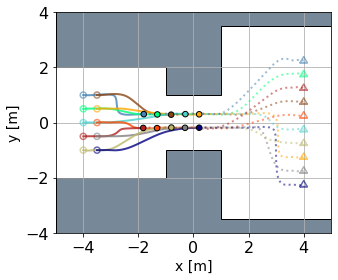

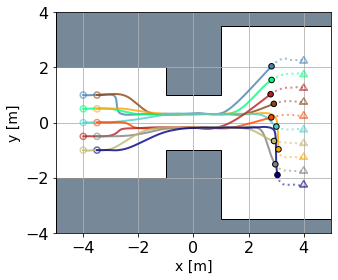

In [27]:
block = block_cf6()
traj_show_map_6(input_name,origin_file,block, orgin_points=[0, 200], rest_points=[200,-1], middle_num=200,enable=[0,1,0], save_bool=True, save_path='./photo/cfs_210719/cf10_0.png')
block = block_cf6()
traj_show_map_6(input_name,origin_file,block, orgin_points=[0, 400], rest_points=[400,-1], middle_num=400,enable=[0,1,0], save_bool=True, save_path='./photo/cfs_210719/cf10_1.png')

## Trajs_show5

In [14]:
from trajs_show5 import *

In [247]:
def traj_show_map_5(traj_file_1, traj_file_2, origin_file, block, orgin_points = [0,-1] , rest_points = [0,-1], replan_points = [0,-1] , middle_num = 350, tri_bool=False, exct_bool=False, save_bool=False, save_path="./defalut.png"):

    raw_data_1 = read_file(traj_file_1)
    raw_data_2 = read_file(traj_file_2)
    origins_traj = read_origin(origin_file)

    multi_raw_trajs_1 = multi_traj_process(raw_data_1)
    num_trajs_1 = len(multi_raw_trajs_1)

    multi_raw_trajs_2 = multi_traj_process(raw_data_2)
    num_trajs_2 = len(multi_raw_trajs_2)

    raw_traj_1 = []
    for i in multi_raw_trajs_1:
        raw_traj_1.append(traj_multi(i))
    
    raw_traj_2 = []
    for i in multi_raw_trajs_2:
        raw_traj_2.append(traj_multi(i))

    
    x = []
    y = []
    for i in range(len(raw_traj_1)):
        x.append( [j+origins_traj[i][0] for j in raw_traj_1[i].rawx[orgin_points[0]: orgin_points[1]] ] )
        y.append( [j+origins_traj[i][1] for j in raw_traj_1[i].rawy[orgin_points[0]: orgin_points[1]] ] )

    x_r = []
    y_r = []
    for i in range(len(raw_traj_1)):
        x_r.append( [j+origins_traj[i][0] for j in raw_traj_1[i].rawx[rest_points[0]: rest_points[1]] ] )
        y_r.append( [j+origins_traj[i][1] for j in raw_traj_1[i].rawy[rest_points[0]: rest_points[1]] ] )
        
    x2 = []
    y2 = []
    for i in range(len(raw_traj_2)):
        x2.append( [j+origins_traj[i][0] for j in raw_traj_2[i].rawx[replan_points[0]:replan_points[1]]] )
        y2.append( [j+origins_traj[i][1] for j in raw_traj_2[i].rawy[replan_points[0]:replan_points[1]]] )    
    
    
    # 无人机图形
    cf_middle = []
    for i in range(len(raw_traj_1)):
        cf_middle.append( crzayflie( raw_traj_1[i].rawx[middle_num]+origins_traj[i][0], raw_traj_1[i].rawy[middle_num]+origins_traj[i][1],color_table[i] ) )
    
    
    # ------开始绘图------
    fig, ax = plt.subplots()
    
    # 绘制障碍物
    ax.add_patch(block)
    
    # 绘制无人机
    for i in cf_middle:
        ax.add_patch(i[0]) # 外圈
        ax.add_patch(i[1]) # 内圈

    # 绘制三角形(Final-Targets)
    if(tri_bool):
        tri_xy = triangle()
        for i in range(len(raw_traj_1)):
            triangle_x = raw_traj_1[i].rawx[-1]+origins_traj[i][0] + tri_xy[0]
            triangle_y = raw_traj_1[i].rawy[-1]+origins_traj[i][1] + tri_xy[1]
            ax.plot(triangle_x,triangle_y,linestyle="--", color = color_table[i]+"CC")
    
    # 绘制矩形(Term-Targets)
    if(exct_bool):
        tri_xy = rectangle()
        for i in range(len(raw_traj_1)):
            triangle_x = raw_traj_2[i].rawx[-1]+origins_traj[i][0] + tri_xy[0]
            triangle_y = raw_traj_2[i].rawy[-1]+origins_traj[i][1] + tri_xy[1]
            ax.plot(triangle_x,triangle_y,linestyle="--",color = color_table[i]+"66")    
    
    # 绘制圆形(Start- Points)
    an = np.linspace(0, 2 * np.pi, 100)
    for i in range(len(raw_traj_1)):
        circle_x = origins_traj[i][0] + 0.11*np.cos(an)
        circle_y = origins_traj[i][1] + 0.11*np.sin(an)
        ax.plot(circle_x,circle_y,linestyle="-.", color = color_table[i]+"CC")    

    # 绘制轨迹
    # 原始轨迹
    for i in range(num_trajs_1):
        ax.plot(x[i],y[i],linestyle="-", linewidth=2, color = color_table[i]+"CC")
    for i in range(num_trajs_1):
        ax.plot(x_r[i],y_r[i],linestyle=":", linewidth=2, color = color_table[i]+"CC")
    # 重归划轨迹
    for i in range(num_trajs_2):
        ax.plot(x2[i],y2[i],linestyle=":", linewidth=2, color = color_table[i]+"99")

    # 一些其他设置
    
    # ax.set_title("3D_Curve")
    
    ax.set_xlabel("x [m]",size = 14)
    ax.set_ylabel("y [m]",size = 14)

    ax.set_xlim([-2.5,2.5])
    ax.set_ylim([-2.0,2.0])

    ax.set_xticks([-2.0, -1.0, 0.0, 1.0, 2.0])
    ax.set_yticks([-2.0, -1.0, 0.0, 1.0, 2.0])
    
    ax.tick_params(labelsize=16)

    ax.grid()
    ax.set_aspect(1.0)
    plt.tight_layout()
    if(save_bool):
        plt.savefig(save_path)
    plt.show()
    

In [164]:
input_name_1 = "./replanning/replanning_origin.txt"
origin_file_1 = "./trajectory_new/replanning_origin/origin.txt"

input_name_2 = "./replanning/replanning_replanned.txt"
origin_file_2 = "./trajectory_new/replanning_replanned/origin.txt"

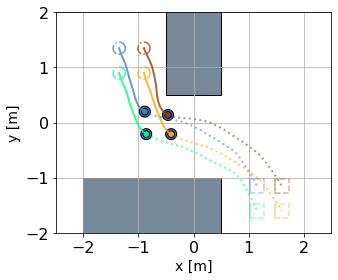

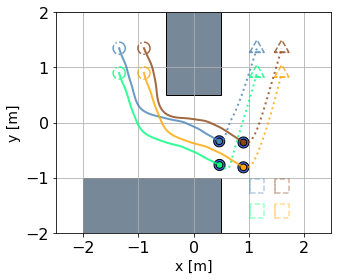

In [248]:
block = block_cf4()
traj_show_map_5(input_name_2,input_name_1,origin_file_1,block,orgin_points=[0, 160], rest_points=[0,0],replan_points=[160,-1],middle_num=160, tri_bool=False, exct_bool=True, save_bool=True, save_path='./photo/cfs_210719/cf4_0.png')
block = block_cf4()
traj_show_map_5(input_name_2,input_name_1,origin_file_1,block,orgin_points=[0, 350], rest_points=[350,-1],replan_points=[0, 0],middle_num=350, tri_bool=True, exct_bool=True, save_bool=True, save_path='./photo/cfs_210719/cf4_1.png')

## Trajs_show4

In [252]:
from trajs_show4 import *

In [253]:
def traj_show_map_4(traj_file,origin_file,block, orgin_points = [0,-1] , rest_points = [0,-1],  middle_num=250,enable=[1,1,1], save_bool=False, save_path="./defalut.png"):

    raw_data = read_file(traj_file)
    origins_traj = read_origin(origin_file)

    multi_raw_trajs = multi_traj_process(raw_data)
    num_trajs = len(multi_raw_trajs)

    raw_traj = []
    for i in multi_raw_trajs:
        raw_traj.append(traj_multi(i))

    
    x = []
    y = []
    for i in range(len(raw_traj)):
        x.append( [j+origins_traj[i][0] for j in raw_traj[i].rawx[orgin_points[0]: orgin_points[1]] ] )
        y.append( [j+origins_traj[i][1] for j in raw_traj[i].rawy[orgin_points[0]: orgin_points[1]] ] )

    x_r = []
    y_r = []
    for i in range(len(raw_traj)):
        x_r.append( [j+origins_traj[i][0] for j in raw_traj[i].rawx[rest_points[0]: rest_points[1]] ] )
        y_r.append( [j+origins_traj[i][1] for j in raw_traj[i].rawy[rest_points[0]: rest_points[1]] ] )
    
    cf_start = []
    for i in range(len(raw_traj)):
        cf_start.append( crzayflie(origins_traj[i][0], origins_traj[i][1],color_table[i]) )

    cf_middle = []
    for i in range(len(raw_traj)):
        cf_middle.append( crzayflie( raw_traj[i].rawx[middle_num]+origins_traj[i][0], raw_traj[i].rawy[middle_num]+origins_traj[i][1],color_table[i] ) )
    
    cf_end = []
    for i in range(len(raw_traj)):
        cf_end.append( crzayflie( raw_traj[i].rawx[-1]+origins_traj[i][0], raw_traj[i].rawy[-1]+origins_traj[i][1], color_table[i] ) )

    # circle = mpatches.Circle([0,0], 0.12, facecolor="#F0F8FF", edgecolor="red")

    fig,ax = plt.subplots()
    
    # ax.add_patch(circle)
    
    # 绘制障碍物
    ax.add_patch(block)
    
    # 绘制起始点、中间点、终点处的无人机
    if enable[0]:
        for i in cf_start:
            ax.add_patch(i[0])
            ax.add_patch(i[1])
    if enable[1]:
        for i in cf_middle:
            ax.add_patch(i[0])
            ax.add_patch(i[1])
    if enable[2]:
        for i in cf_end:
            ax.add_patch(i[0])
            ax.add_patch(i[1])
    
    # 绘制目标点三角形
    tri_xy = triangle()
    for i in range(len(raw_traj)):
        triangle_x = raw_traj[i].rawx[-1]+origins_traj[i][0] + tri_xy[0]
        triangle_y = raw_traj[i].rawy[-1]+origins_traj[i][1] + tri_xy[1]
        ax.plot(triangle_x,triangle_y,linestyle="--", color = color_table[i]+"CC")
    
    # 绘制起始点圆形
    an = np.linspace(0, 2 * np.pi, 100)
    for i in range(len(raw_traj)):
        circle_x = origins_traj[i][0] + 0.11*np.cos(an)
        circle_y = origins_traj[i][1] + 0.11*np.sin(an)
        ax.plot(circle_x,circle_y,linestyle="-.", color = color_table[i]+"CC")

    for i in range(num_trajs):
        ax.plot(x[i],y[i],linestyle="-", linewidth=2, color = color_table[i]+"CC")
    for i in range(num_trajs):
        ax.plot(x_r[i],y_r[i],linestyle=":", linewidth=2, color = color_table[i]+"88")
        
    # ax.set_title("3D_Curve")
    ax.set_xlabel("x [m]",size = 14)
    ax.set_ylabel("y [m]",size = 14)
    ax.set_xlim([-2.5,2.5])
    ax.set_ylim([-2.0,2.0])
    ax.set_xticks([-2.0, -1.0, 0.0, 1.0, 2.0])
    ax.set_yticks([-2.0, -1.0, 0.0, 1.0, 2.0])
    ax.tick_params(labelsize=16)

    ax.grid()
    ax.set_aspect(1.0)
    plt.tight_layout()
    if(save_bool):
        plt.savefig(save_path)
    plt.show()

In [254]:
input_name = "./map_1010/map1010_6RobotsCorridorFormationChange_10s_500.txt"
origin_file = "./trajectory_new/map1010_6RobotsCorridorFormationChange_10s_500/origin.txt"

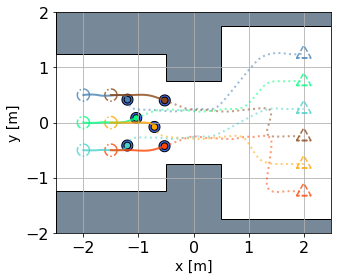

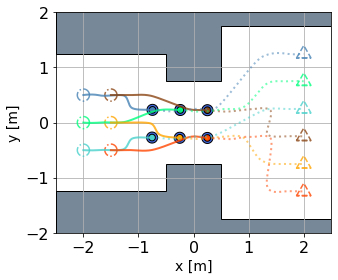

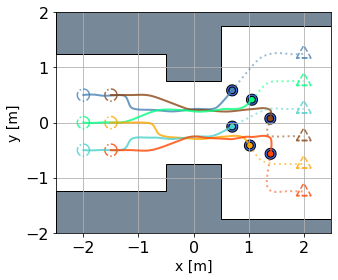

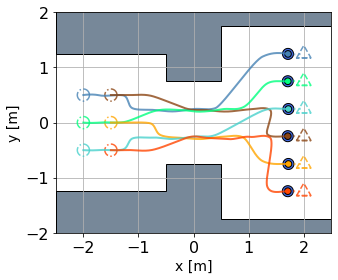

In [255]:
block = block_cf6()
traj_show_map_4(input_name,origin_file,block, orgin_points=[0, 120], rest_points=[120,-1], middle_num=120,enable=[0,1,0], save_bool=True, save_path='./photo/cfs_210719/cf6_0.png')
block = block_cf6()
traj_show_map_4(input_name,origin_file,block, orgin_points=[0, 200], rest_points=[200,-1], middle_num=200,enable=[0,1,0], save_bool=True, save_path='./photo/cfs_210719/cf6_1.png')
block = block_cf6()
traj_show_map_4(input_name,origin_file,block, orgin_points=[0, 370], rest_points=[370,-1], middle_num=370,enable=[0,1,0], save_bool=True, save_path='./photo/cfs_210719/cf6_2.png')
block = block_cf6()
traj_show_map_4(input_name,origin_file,block, orgin_points=[0, 450], rest_points=[450,-1], middle_num=450,enable=[0,1,0], save_bool=True, save_path='./photo/cfs_210719/cf6_3.png')